# Exploring Life Expectancy and Possible Correlations

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This report observes global trends in life expectancy and asks whether there might be correlations to societal indicators. Given the data available in the resource assigned, and with completeness and recency of data in mind, I chose three societal indicators that I would expect to have a fairly strong correlation to life expectancy; Democracy Index (EIU), internet users, and electricity generation per person. Initial observation will be performed via a snapshot of 2016 values. The indicator showing the strongest correlation to life expectancy will be explored further.

The following tables were pulled from <https://www.Gapminder.org/data>:

**Life Expentancy:** Health > Life expectancy, years

**Democracy Index (EIU):** Society > Democracy > Democracy indices from EIU > Democracy Index (EIU)

**Internet users:** Communication > Internet users

**Electricity generation /person:** Energy > Electricity > Electricity generation /person

In [941]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



<a id='wrangling'></a>
## Data Wrangling

#### Here I'll create the four base dataframes for use in the analysis, and I'd like to use the country column as index for each dataframe

In [942]:
# Create initial dataframes from csv files
df_life = pd.read_csv('life_expectancy_years.csv', index_col='country')
df_demox = pd.read_csv('demox_eiu.csv', index_col='country')
df_internet = pd.read_csv('internet_users.csv', index_col='country')
df_electric = pd.read_csv('electricity_generation_per_person.csv', index_col='country')


### Reviewing and cleaning the df_life dataframe which contains life expectancy data

In [943]:
#view first rows of df_life
df_life.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


#### Here I'll alter the dataframe to only include years 1920 through 2020. I think this is a reasonable timeframe for observing the global trend in life expectancy

In [944]:
# using .loc to select a range of the dataframe
df_life = df_life.loc['Afghanistan':, '1920':'2020']
df_life.head()

,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,30.6,30.7,30.8,30.8,30.9,31.0,31.0,31.1,31.1,31.2,...,60.4,60.8,61.3,61.2,61.2,61.2,63.4,63.7,64.1,64.4
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,77.7,77.8,77.9,77.9,78.0,78.1,78.2,78.3,78.5,78.6
Algeria,29.6,29.6,29.4,32.0,33.5,34.3,33.6,28.8,32.4,32.7,...,76.5,76.8,76.9,77.0,77.1,77.4,77.7,77.9,78.1,78.3
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.4,82.4,82.5,82.5,82.6,82.7,82.7,NaN,NaN,NaN
Angola,30.4,30.5,30.6,30.6,30.7,30.8,30.8,30.9,31.0,31.0,...,60.6,61.3,61.9,62.8,63.3,63.8,64.2,64.6,65.0,65.4


#### I already see some null values - how many rows with null values?

In [945]:
df_life.isnull().any(axis=1).sum()

3

#### As I have a large number of rows to work with in observing mean life expectancy, I'll drop the rows containing null values and confirm that nulls have been removed

In [946]:
df_life.dropna(axis=0, inplace = True)
df_life.isnull().any(axis=1).sum()

0

#### Any duplicates?

In [947]:
df_life.duplicated().any()

False

#### What about data types?

In [948]:
df_life.dtypes.value_counts()

float64    101
dtype: int64

### Reviewing and cleaning the df_demox dataframe, which contains Democracy Index data

In [949]:
df_demox.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,
Afghanistan,0.306,0.304,0.302,0.275,0.248,0.248,0.248,0.248,0.277,0.277,0.255,0.255,0.297
Albania,0.591,0.591,0.591,0.589,0.586,0.581,0.567,0.567,0.567,0.591,0.591,0.598,0.598
Algeria,0.317,0.325,0.332,0.338,0.344,0.344,0.383,0.383,0.383,0.395,0.356,0.356,0.350
Angola,0.241,0.288,0.335,0.334,0.332,0.332,0.335,0.335,0.335,0.335,0.340,0.362,0.362
Argentina,0.663,0.663,0.663,0.673,0.684,0.684,0.684,0.684,0.684,0.702,0.696,0.696,0.702


#### Initially, I'll only need a snapshot of Democracy Index data, for the year 2016. I'll isolate the 2016 data from this dataframe, which actually creates a series as it is reduced to a single dimension

In [950]:
demox_2016 = df_demox['2016']
# I'll multiply the values in this series by 100, changing the scale to be more easily readible as a percentage
demox_2016 = df_demox['2016'] * 100
demox_2016.head()

country
Afghanistan    25.5
Albania        59.1
Algeria        35.6
Angola         34.0
Argentina      69.6
Name: 2016, dtype: float64

#### Any rows with null values?

In [951]:
demox_2016.isnull().any()

False

#### What about data types?

In [952]:
demox_2016.dtype

dtype('float64')

### Reviewing and cleaning the df_internet dataframe which contains internet users data

In [953]:
df_internet.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.55,4.0,5.0,5.45,5.9,7.0,8.26,11.2,13.5,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.20,45.0,49.0,54.70,57.2,60.1,63.30,66.4,71.8,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.20,12.5,14.9,18.20,22.5,29.5,38.20,42.9,47.7,49.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.50,81.0,81.0,86.40,94.0,95.9,96.90,97.9,91.6,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.30,2.8,3.1,6.50,8.9,21.4,12.40,13.0,14.3,NaN


#### We'll only need the data for 2016, so I'll create a series with this data

In [954]:
internet_2016 = df_internet['2016']
internet_2016.head()

country
Afghanistan    11.2
Albania        66.4
Algeria        42.9
Andorra        97.9
Angola         13.0
Name: 2016, dtype: float64

#### Any NULLs?

In [955]:
internet_2016.isnull().any()

True

#### How many?

In [956]:
internet_2016.isnull().sum()

4

#### Again, as we have a large number of rows to work with in our analysis, dropping 4 rows shouldn't be detrimental. Let's drop them and confirm the series is free of nulls

In [957]:
internet_2016.dropna(axis=0, inplace = True)
internet_2016.isnull().any()

False

### Reviewing and cleaning the df_electric dataframe, which contains data on electricity generation per person

In [958]:
df_electric.head()

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Algeria,544.0,559.0,532.0,568.0,607.0,621.0,653.0,673,699,701.0,...,1090,1150,1220,1270,1440,1530,1560,1640,1730,1730
Argentina,1490.0,1590.0,1660.0,1670.0,1580.0,1560.0,1620.0,1680,1810,1890.0,...,2880,3190,3180,3210,3110,3230,3280,3290,3350,3350
Australia,7860.0,8100.0,8360.0,8670.0,9020.0,9130.0,9150.0,9230,9350,9510.0,...,11600,11500,11500,11300,11400,11000,10800,10500,10600,10600
Austria,5850.0,5860.0,6610.0,6400.0,6530.0,6530.0,6620.0,6540,6670,6710.0,...,7800,8030,8250,8450,7780,8500,7930,7540,7480,7760
Azerbaijan,3110.0,3180.0,3320.0,3360.0,3270.0,3200.0,3170.0,2630,2520,2290.0,...,2500,2450,2110,2070,2220,2480,2490,2600,2570,2570


#### I'll create a series with 2016 data

In [959]:
electric_2016 = df_electric['2016']
electric_2016.head()

country
Algeria        1730
Argentina      3350
Australia     10600
Austria        7760
Azerbaijan     2570
Name: 2016, dtype: int64

#### I see these values are dtype int64. I'll convert these values to dtype float, so they are consistent with data in the other dataframes

In [960]:
electric_2016 = df_electric_2016.astype(float)
electric_2016.head()

country
Algeria        1730.0
Argentina      3350.0
Australia     10600.0
Austria        7760.0
Azerbaijan     2570.0
Name: 2016, dtype: float64

#### Any NULLs?

In [961]:
df_electric_2016.isnull().any()

False

## Exploratory Data Analysis

### Question #1: What is the global trend in mean life expectancy?

#### I'll use numpy's mean function to find the mean life expectancy across all countries for each year

In [962]:
life_mean = np.mean(df_life, axis=0)
life_mean.head()

1920    34.959783
1921    35.442391
1922    35.767935
1923    36.519022
1924    36.805435
dtype: float64

#### Here, I'll use reset_index to bring the index back as a column, which converts life_mean to a dataframe

In [963]:
df_life_mean = life_mean.reset_index()
df_life_mean.head()

,index,0
0,1920,34.959783
1,1921,35.442391
2,1922,35.767935
3,1923,36.519022
4,1924,36.805435


#### I'll then rename the colums

In [964]:
df_life_mean.rename(columns = {'index':'year', 0:'mean_le'}, inplace = True)
df_life_mean.head()

,year,mean_le
0,1920,34.959783
1,1921,35.442391
2,1922,35.767935
3,1923,36.519022
4,1924,36.805435


#### Next, I'll plot the dataframe, so we can observe global life expectancy trend

C:\Users\John\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


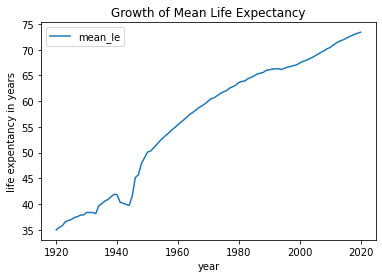

In [965]:
df_life_mean.plot(x='year', y='mean_le')
plt.title('Growth of Mean Life Expectancy')
plt.xlabel('year')
plt.ylabel('life expentancy in years');


#### Observing the trend line, we see that global mean life expectancy has *more than doubled since 1920!*

### Question #2: Is there a correlation between Democracy Index and life expectancy?

#### First, I'd like to observe a histogram, to get a sense of the distribution of Democracy Index scores

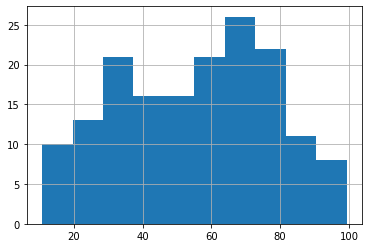

In [966]:
df_demox_2016.hist();

#### A left skewed distribution - it seems global democracy index scores are generally leaning toward high values

#### Next, I'll create a series that contains life expectancy data for 2016 only, to be merged with the other 2016 series created earlier

In [967]:
life_2016 = df_life['2016']
life_2016.head()

country
Afghanistan            61.2
Albania                78.1
Algeria                77.4
Angola                 63.8
Antigua and Barbuda    77.0
Name: 2016, dtype: float64

#### Next, I'll merge the 2016 data for life expectancy and democracy index, creating a new dataframe

In [968]:
df_life_demox = pd.merge(life_2016, demox_2016, how='inner', left_on=['country'], right_on=['country'])
df_life_demox.head()

,2016_x,2016_y
country,,
Afghanistan,61.2,25.5
Albania,78.1,59.1
Algeria,77.4,35.6
Angola,63.8,34.0
Argentina,76.5,69.6


#### I'll create new labels for each column

In [969]:
df_life_demox.rename(columns={'2016_x':'life_expectancy_2016','2016_y':'democracy_index_2016'}, inplace = True)
df_life_demox.head()

,life_expectancy_2016,democracy_index_2016
country,,
Afghanistan,61.2,25.5
Albania,78.1,59.1
Algeria,77.4,35.6
Angola,63.8,34.0
Argentina,76.5,69.6


#### Next Id like to observe correlation via a scatter plot, but since I'll be creating mutiple scatter plots in this project, I'll create a function for creating a scatter plot

In [970]:
def splot (df, column1, column2):
    return df.plot(x=column1, y=column2, kind='scatter');

#### Now I'll call the function to create a scatter plot

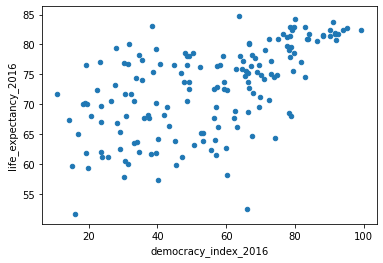

In [971]:
splot(df_life_demox, 'democracy_index_2016','life_expectancy_2016');

#### The correlation looks fairly strong. Let's look at the correlation coefficient. But first, I'll create a function for correlation coefficient as well

In [972]:
def corr (df, column1, column2):
    return df[column1].corr(df[column2])

#### Now I'll call the corr function

In [973]:
corr (df_life_demox, 'democracy_index_2016', 'life_expectancy_2016')

0.5775865832086655

#### The correlation cofficient confirms that there is a fairly strong correlation between Democracy Index and life expectancy

### Question #3: Is there a correlation between internet access and life expectancy?

#### First, I'd like to create a bar chart to observe how countries might be placed into categories based on whether they are below or above average in their internet usage %

In [974]:
# Find the mean of the 2016 internet users values
internet_2016.mean()

49.257315789473665

#### I'll convert the series back into a dataframe

In [975]:
df_in_2016 = internet_2016.to_frame()
df_in_2016.head()

,2016
country,
Afghanistan,11.2
Albania,66.4
Algeria,42.9
Andorra,97.9
Angola,13.0


#### Now I'll place countries into two groups; one for above average and one for below

In [976]:
#create the edges of each bin, or group, into which countries will be placed
bin_edges = [0, 49.257315789473665, 100]
#create the labels for the groups
bin_names = ['below_avg', 'above_avg']
#separate countries by values and place them into bins, or groups
df_in_2016['groups'] = pd.cut(df_in_2016['2016'], bin_edges, labels = bin_names)
df_in_2016.head()

,2016,groups
country,,
Afghanistan,11.2,below_avg
Albania,66.4,above_avg
Algeria,42.9,below_avg
Andorra,97.9,above_avg
Angola,13.0,below_avg


#### And I'll create the bar chart

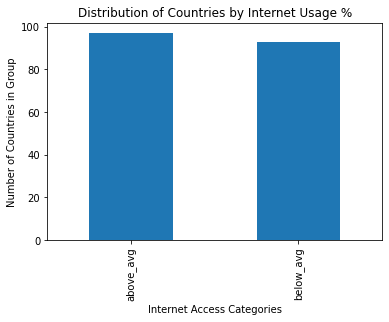

In [977]:
df_in_2016['groups'].value_counts().plot(kind = 'bar')
plt.xlabel('Internet Access Categories')
plt.ylabel('Number of Countries in Group')
plt.title('Distribution of Countries by Internet Usage %');

#### Next, I'll create a new dataframe by merging the 2016 internet data with the 2016 life expectancy data

In [978]:
df_life_internet = pd.merge(life_2016, internet_2016, how='inner', left_on=['country'], right_on=['country'])
df_life_internet.head()

,2016_x,2016_y
country,,
Afghanistan,61.2,11.2
Albania,78.1,66.4
Algeria,77.4,42.9
Angola,63.8,13.0
Antigua and Barbuda,77.0,73.0


#### I'll create new column names

In [979]:
df_life_internet.rename(columns={'2016_x':'life_expectancy_2016','2016_y':'internet_2016'}, inplace = True)
df_life_internet.head()

,life_expectancy_2016,internet_2016
country,,
Afghanistan,61.2,11.2
Albania,78.1,66.4
Algeria,77.4,42.9
Angola,63.8,13.0
Antigua and Barbuda,77.0,73.0


#### Now, I'll call the splot function created earlier

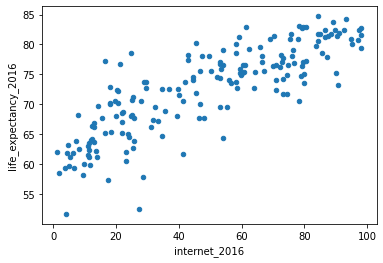

In [980]:
splot (df_life_internet, 'internet_2016', 'life_expectancy_2016');

#### And the corr function

In [981]:
corr (df_life_internet, 'life_expectancy_2016', 'internet_2016')

0.8308816719783941

#### A very strong correlation between internet access and life expectancy!

### Question #4: Is there a correlation between electricity production and life expectancy?

#### I'll start by creating the new merged dataframe

In [982]:
df_life_electric = pd.merge(life_2016, electric_2016, how='inner', left_on=['country'], right_on=['country'])
df_life_electric.head()

,2016_x,2016_y
country,,
Algeria,77.4,1730.0
Argentina,76.5,3350.0
Australia,82.5,10600.0
Austria,81.7,7760.0
Azerbaijan,70.6,2570.0


#### And I'll change the column names

In [983]:
df_life_electric.rename(columns={'2016_x': 'life_expectancy_2016', '2016_y':'electric_2016'}, inplace = True)
df_life_electric.head()

,life_expectancy_2016,electric_2016
country,,
Algeria,77.4,1730.0
Argentina,76.5,3350.0
Australia,82.5,10600.0
Austria,81.7,7760.0
Azerbaijan,70.6,2570.0


#### Let's check correlation

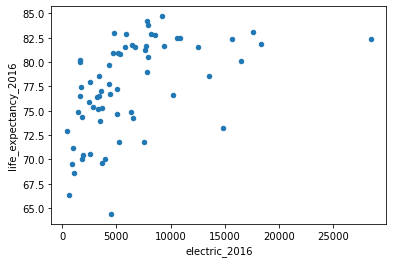

In [984]:
splot (df_life_electric, 'electric_2016', 'life_expectancy_2016');

#### In the above scatter plot, I see one extreme outlier that I'd like to clean from the data. I'll alter the dataframe by querying only rows with electricity production below 20,000

In [985]:
df_life_electric = df_life_electric.query('electric_2016 < 20000')

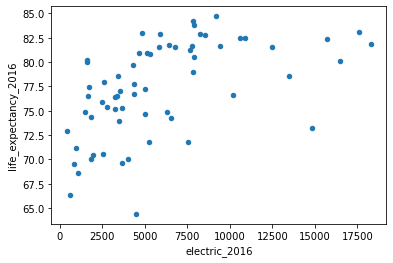

In [986]:
splot (df_life_electric, 'electric_2016','life_expectancy_2016');

In [987]:
corr (df_life_electric, 'life_expectancy_2016','electric_2016')

0.5278984335897556

#### There certainly appears to be some correlation here as well

### Question #5: Does the correlation between internet usage and life expectancy observed in 2016 translate into correlation over time?

#### Within a limited timeframe, I'll observe how much each country has increased their internet usage percentage, and how much each country's life expectancy has increased during the same timeframe. I will then observe correlation between both measures of growth

#### First, I'll go back to the original dataframe containing internet usage data

In [988]:
df_internet.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.55,4.0,5.0,5.45,5.9,7.0,8.26,11.2,13.5,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.20,45.0,49.0,54.70,57.2,60.1,63.30,66.4,71.8,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.20,12.5,14.9,18.20,22.5,29.5,38.20,42.9,47.7,49.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.50,81.0,81.0,86.40,94.0,95.9,96.90,97.9,91.6,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.30,2.8,3.1,6.50,8.9,21.4,12.40,13.0,14.3,NaN


#### The original sheet contains many NaN values, and data is very incomplete prior to 1997. I'll alter the dataframe to include only 1997 onward, and then address NaN values.

In [989]:
df_internet_clean = df_internet.loc['Afghanistan':, '1997':]
df_internet_clean.head(20)

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,0.00472,0.00456,0.0879,0.106,1.220,2.11,...,3.55,4.00,5.00,5.45,5.90,7.0,8.26,11.2,13.5,NaN
Albania,0.04860,0.06500,0.0814,0.114,0.32600,0.39000,0.9720,2.420,6.040,9.61,...,41.20,45.00,49.00,54.70,57.20,60.1,63.30,66.4,71.8,NaN
Algeria,0.01030,0.02020,0.2000,0.492,0.64600,1.59000,2.2000,4.630,5.840,7.38,...,11.20,12.50,14.90,18.20,22.50,29.5,38.20,42.9,47.7,49.0
Andorra,3.05000,6.89000,7.6400,10.500,NaN,11.30000,13.5000,26.800,37.600,48.90,...,78.50,81.00,81.00,86.40,94.00,95.9,96.90,97.9,91.6,NaN
Angola,0.00567,0.01850,0.0720,0.105,0.13600,0.27000,0.3710,0.465,1.140,1.50,...,2.30,2.80,3.10,6.50,8.90,21.4,12.40,13.0,14.3,NaN
Antigua and Barbuda,3.48000,4.07000,5.3000,6.480,8.90000,12.50000,17.2000,24.300,27.000,30.00,...,42.00,47.00,52.00,58.00,63.40,67.8,70.00,73.0,76.0,NaN
Argentina,0.28000,0.83100,3.2800,7.040,9.78000,10.90000,11.9000,16.000,17.700,20.90,...,34.00,45.00,51.00,55.80,59.90,64.7,68.00,71.0,74.3,NaN
Armenia,0.11200,0.12900,0.9710,1.300,1.63000,1.96000,4.5800,4.900,5.250,5.63,...,15.30,25.00,32.00,37.50,41.90,54.6,59.10,64.3,64.7,NaN
Australia,16.40000,30.80000,40.8000,46.800,52.70000,NaN,NaN,NaN,63.000,66.00,...,74.30,76.00,79.50,79.00,83.50,84.0,84.60,86.5,86.5,NaN


#### Regarding NaN values, it seems logical to use linear interpolation, filling NaN values in both directions. I considered using interpolation in a forward direction only and filling the remaining NaNs with zeros, but I felt it best to use a country's first recorded internet usage percentage in the given timeframe as it's lowest value, as opposed to possibly calculating growth from a zero value caused simply by missing data

In [990]:
# fill NaN values via interpolation
df_internet_clean.interpolate(method='linear', axis=1, inplace = True, limit_direction = 'both')
df_internet_clean.head(20)

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.00472,0.00472,0.00472,0.00472,0.00472,0.00456,0.0879,0.106,1.2200,2.11,...,3.55,4.00,5.00,5.45,5.90,7.0,8.26,11.2,13.5,13.5
Albania,0.04860,0.06500,0.08140,0.11400,0.32600,0.39000,0.9720,2.420,6.0400,9.61,...,41.20,45.00,49.00,54.70,57.20,60.1,63.30,66.4,71.8,71.8
Algeria,0.01030,0.02020,0.20000,0.49200,0.64600,1.59000,2.2000,4.630,5.8400,7.38,...,11.20,12.50,14.90,18.20,22.50,29.5,38.20,42.9,47.7,49.0
Andorra,3.05000,6.89000,7.64000,10.50000,10.90000,11.30000,13.5000,26.800,37.6000,48.90,...,78.50,81.00,81.00,86.40,94.00,95.9,96.90,97.9,91.6,91.6
Angola,0.00567,0.01850,0.07200,0.10500,0.13600,0.27000,0.3710,0.465,1.1400,1.50,...,2.30,2.80,3.10,6.50,8.90,21.4,12.40,13.0,14.3,14.3
Antigua and Barbuda,3.48000,4.07000,5.30000,6.48000,8.90000,12.50000,17.2000,24.300,27.0000,30.00,...,42.00,47.00,52.00,58.00,63.40,67.8,70.00,73.0,76.0,76.0
Argentina,0.28000,0.83100,3.28000,7.04000,9.78000,10.90000,11.9000,16.000,17.7000,20.90,...,34.00,45.00,51.00,55.80,59.90,64.7,68.00,71.0,74.3,74.3
Armenia,0.11200,0.12900,0.97100,1.30000,1.63000,1.96000,4.5800,4.900,5.2500,5.63,...,15.30,25.00,32.00,37.50,41.90,54.6,59.10,64.3,64.7,64.7
Australia,16.40000,30.80000,40.80000,46.80000,52.70000,55.27500,57.8500,60.425,63.0000,66.00,...,74.30,76.00,79.50,79.00,83.50,84.0,84.60,86.5,86.5,86.5


#### Next I'll add a new column which contains each country's internet usage growth in percentage points, by subtracting its minimum value from its maximum value

In [991]:
df_internet_clean['growth'] = df_internet_clean.max(axis = 1) - df_internet_clean.min(axis = 1)
df_internet_clean.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,growth
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.00472,0.00472,0.00472,0.00472,0.00472,0.00456,0.0879,0.106,1.22,2.11,...,4.0,5.0,5.45,5.9,7.0,8.26,11.2,13.5,13.5,13.49544
Albania,0.04860,0.06500,0.08140,0.11400,0.32600,0.39000,0.9720,2.420,6.04,9.61,...,45.0,49.0,54.70,57.2,60.1,63.30,66.4,71.8,71.8,71.75140
Algeria,0.01030,0.02020,0.20000,0.49200,0.64600,1.59000,2.2000,4.630,5.84,7.38,...,12.5,14.9,18.20,22.5,29.5,38.20,42.9,47.7,49.0,48.98970
Andorra,3.05000,6.89000,7.64000,10.50000,10.90000,11.30000,13.5000,26.800,37.60,48.90,...,81.0,81.0,86.40,94.0,95.9,96.90,97.9,91.6,91.6,94.85000
Angola,0.00567,0.01850,0.07200,0.10500,0.13600,0.27000,0.3710,0.465,1.14,1.50,...,2.8,3.1,6.50,8.9,21.4,12.40,13.0,14.3,14.3,21.39433


#### Now I'll return to the earlier dataframe containing life expectancy data

In [992]:
df_life.head()

,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,30.6,30.7,30.8,30.8,30.9,31.0,31.0,31.1,31.1,31.2,...,60.4,60.8,61.3,61.2,61.2,61.2,63.4,63.7,64.1,64.4
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,77.7,77.8,77.9,77.9,78.0,78.1,78.2,78.3,78.5,78.6
Algeria,29.6,29.6,29.4,32.0,33.5,34.3,33.6,28.8,32.4,32.7,...,76.5,76.8,76.9,77.0,77.1,77.4,77.7,77.9,78.1,78.3
Angola,30.4,30.5,30.6,30.6,30.7,30.8,30.8,30.9,31.0,31.0,...,60.6,61.3,61.9,62.8,63.3,63.8,64.2,64.6,65.0,65.4
Antigua and Barbuda,33.9,33.9,34.8,35.6,36.4,37.3,38.1,39.0,39.8,40.7,...,76.7,76.7,76.8,76.8,76.9,77.0,77.0,77.2,77.3,77.4


#### I'll create a new dataframe limited to the same timeframe as the dataframe containing internet usage data, 1997 to 2018.

In [993]:
df_life_97_18 = df_life.loc['Afghanistan':,'1997':'2018']
df_life_97_18.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,53.7,52.8,54.4,54.6,54.8,55.6,56.4,56.9,57.4,57.6,...,59.3,59.9,60.4,60.8,61.3,61.2,61.2,61.2,63.4,63.7
Albania,72.5,74.5,74.6,74.9,75.2,75.3,75.4,75.6,76.0,76.4,...,77.5,77.6,77.7,77.8,77.9,77.9,78.0,78.1,78.2,78.3
Algeria,73.2,73.5,73.9,74.0,74.2,74.5,74.6,75.0,75.3,75.5,...,76.1,76.3,76.5,76.8,76.9,77.0,77.1,77.4,77.7,77.9
Angola,50.2,49.3,50.7,51.7,52.4,53.5,54.2,54.8,55.7,56.4,...,59.1,59.9,60.6,61.3,61.9,62.8,63.3,63.8,64.2,64.6
Antigua and Barbuda,74.4,74.5,74.6,74.7,74.9,75.2,75.4,75.6,75.8,76.0,...,76.6,76.6,76.7,76.7,76.8,76.8,76.9,77.0,77.0,77.2


#### I'll now add a column to find the growth in years

In [994]:
df_life_97_18['growth'] = df_life_97_18.max(axis = 1) - df_life_97_18.min(axis = 1)
df_life_97_18.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,growth
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,53.7,52.8,54.4,54.6,54.8,55.6,56.4,56.9,57.4,57.6,...,59.9,60.4,60.8,61.3,61.2,61.2,61.2,63.4,63.7,10.9
Albania,72.5,74.5,74.6,74.9,75.2,75.3,75.4,75.6,76.0,76.4,...,77.6,77.7,77.8,77.9,77.9,78.0,78.1,78.2,78.3,5.8
Algeria,73.2,73.5,73.9,74.0,74.2,74.5,74.6,75.0,75.3,75.5,...,76.3,76.5,76.8,76.9,77.0,77.1,77.4,77.7,77.9,4.7
Angola,50.2,49.3,50.7,51.7,52.4,53.5,54.2,54.8,55.7,56.4,...,59.9,60.6,61.3,61.9,62.8,63.3,63.8,64.2,64.6,15.3
Antigua and Barbuda,74.4,74.5,74.6,74.7,74.9,75.2,75.4,75.6,75.8,76.0,...,76.6,76.7,76.7,76.8,76.8,76.9,77.0,77.0,77.2,2.8


#### Now I'll create new dataframes containing only growth data, and merge them for our final analysis

In [995]:
df_in_growth = df_internet_clean['growth']
df_le_growth = df_life_97_18['growth']
df_growth = pd.merge(df_in_growth, df_le_growth, how='inner', left_on=['country'], right_on=['country'])
df_growth.head()

,growth_x,growth_y
country,,
Afghanistan,13.49544,10.9
Albania,71.75140,5.8
Algeria,48.98970,4.7
Angola,21.39433,15.3
Antigua and Barbuda,72.52000,2.8


#### I'll rename the columns

In [996]:
df_growth.rename(columns = {'growth_x':'internet_growth', 'growth_y':'le_growth'}, inplace = True)
df_growth.head()

,internet_growth,le_growth
country,,
Afghanistan,13.49544,10.9
Albania,71.75140,5.8
Algeria,48.98970,4.7
Angola,21.39433,15.3
Antigua and Barbuda,72.52000,2.8


#### Now we'll look at correlation

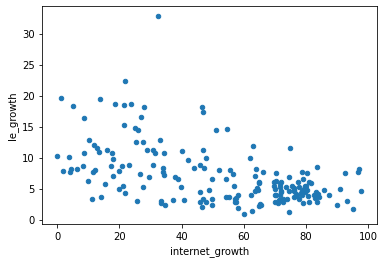

In [997]:
splot (df_growth, 'internet_growth', 'le_growth');

In [998]:
corr(df_growth, 'internet_growth', 'le_growth')

-0.5144418809793821

#### A surprisingly negative correlation!

<a id='conclusions'></a>
## Conclusions

>A snapshot of 2016 showed a very strong correlation between life expectancy and a population's usage of internet services, although this should be expected as a country with a telecommunications infrastructure large enough to provide internet services to a large portion of its population likely also has ample access to health and medical technologies. Interestingly, viewing the relationship between these two variables over time reveals a negative correlation i.e. the more internet usage growth, the slower the rate of growth of life expectancy. This might suggest that a more technological society creates a more sedintary population, which then becomes less healthy over time. In this case, however, I believe a number of different indicators, not observed here, likely have a large impact on global life expectancy trends.